In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np 
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [3]:
# !nvidia-smi

### Loading the dataset

In [4]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

4431872/4422102 [==============================] - 0s 0us/step


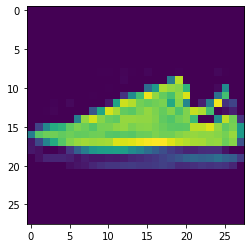

In [5]:
plt.imshow(X_train[6])

In [6]:
X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255

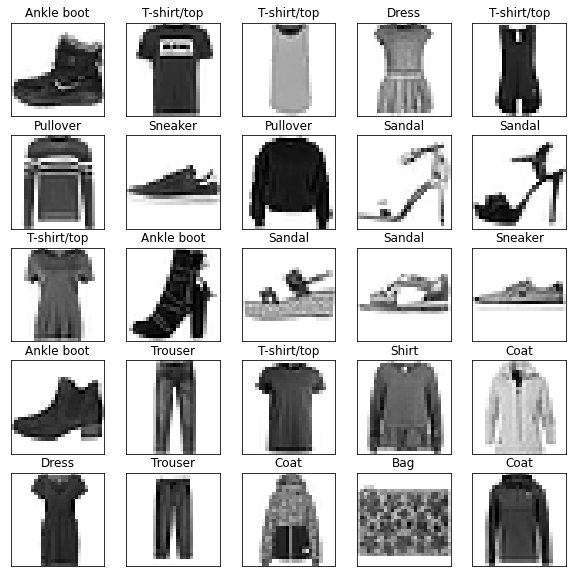

In [7]:
figure = plt.figure(figsize=(10,10))
for i in range(25):
  plt.subplot(5, 5, i+1, title=class_names[y_train[i]])
  plt.xticks([])
  plt.yticks([])
  plt.imshow(X_train[i], cmap=plt.cm.binary)

### Model definition

In [8]:
model = keras.models.Sequential([
                                 keras.layers.Flatten(input_shape=(28,28)),
                                 keras.layers.Dense(32, activation='relu'),
                                 keras.layers.Dense(10, activation='softmax')
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 32)                25120     
                                                                 
 dense_1 (Dense)             (None, 10)                330       
                                                                 
Total params: 25,450
Trainable params: 25,450
Non-trainable params: 0
_________________________________________________________________


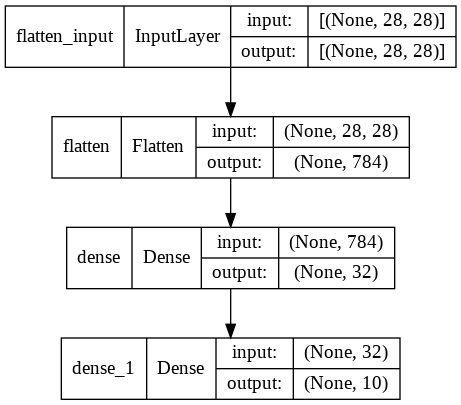

In [9]:
keras.utils.plot_model(model, show_shapes=True)

In [10]:
model1 = tf.keras.Sequential()
model1.add(keras.layers.Flatten(input_shape=(28,28)))
model1.add(keras.layers.Dense(32, activation='relu'))
model1.add(keras.layers.Dense(10, activation='softmax'))

model1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_2 (Dense)             (None, 32)                25120     
                                                                 
 dense_3 (Dense)             (None, 10)                330       
                                                                 
Total params: 25,450
Trainable params: 25,450
Non-trainable params: 0
_________________________________________________________________


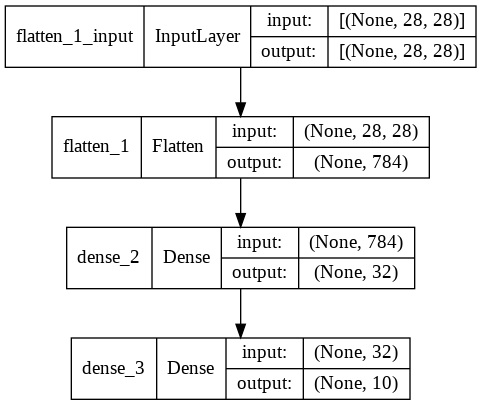

In [11]:
keras.utils.plot_model(model1, show_shapes=True)

In [12]:
from keras.models import Model

inputs = keras.Input(shape=(28,28))
x = keras.layers.Flatten()(inputs)
x = keras.layers.Dense(32, activation='relu')(x)
outputs = keras.layers.Dense(10, activation='softmax')(x)

model2 = Model(inputs, outputs)
model2.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28)]          0         
                                                                 
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_4 (Dense)             (None, 32)                25120     
                                                                 
 dense_5 (Dense)             (None, 10)                330       
                                                                 
Total params: 25,450
Trainable params: 25,450
Non-trainable params: 0
_________________________________________________________________


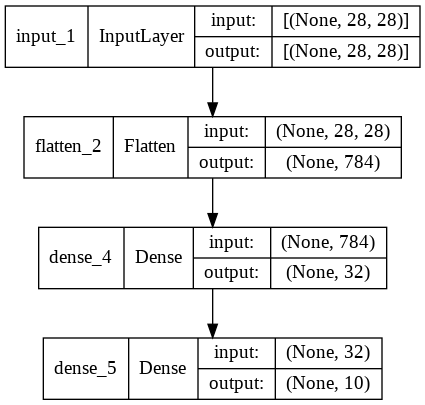

In [13]:
keras.utils.plot_model(model2, show_shapes=True)

### training

In [14]:
from datetime import datetime

In [28]:
!rm -rf /content/logs/image

In [23]:
logdir = "logs/image/" + datetime.now().strftime("%Y%m%d-%H%M%S")

tb_callback = keras.callbacks.TensorBoard(log_dir=logdir)

In [29]:
model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

In [30]:
model.fit(
    X_train,
    y_train,
    batch_size=50,
    epochs=20,
    verbose=1,
    validation_split=0.2,
    callbacks=[tb_callback]
)

Epoch 1/20
960/960 [==============================] - 4s 4ms/step - loss: 0.2720 - accuracy: 0.9018 - val_loss: 0.3572 - val_accuracy: 0.8750
Epoch 2/20
960/960 [==============================] - 4s 4ms/step - loss: 0.2661 - accuracy: 0.9029 - val_loss: 0.3537 - val_accuracy: 0.8753
Epoch 3/20
960/960 [==============================] - 4s 4ms/step - loss: 0.2645 - accuracy: 0.9022 - val_loss: 0.3566 - val_accuracy: 0.8779
Epoch 4/20
960/960 [==============================] - 4s 4ms/step - loss: 0.2595 - accuracy: 0.9049 - val_loss: 0.3518 - val_accuracy: 0.8811
Epoch 5/20
960/960 [==============================] - 4s 4ms/step - loss: 0.2552 - accuracy: 0.9064 - val_loss: 0.3673 - val_accuracy: 0.8762
Epoch 6/20
960/960 [==============================] - 4s 4ms/step - loss: 0.2533 - accuracy: 0.9068 - val_loss: 0.3680 - val_accuracy: 0.8717
Epoch 7/20
960/960 [==============================] - 4s 4ms/step - loss: 0.2493 - accuracy: 0.9081 - val_loss: 0.3529 - val_accuracy: 0.8813
Epoch 

In [26]:
%load_ext tensorboard

In [ ]:
%tensorboard --logdir /content/logs

### Evaluation

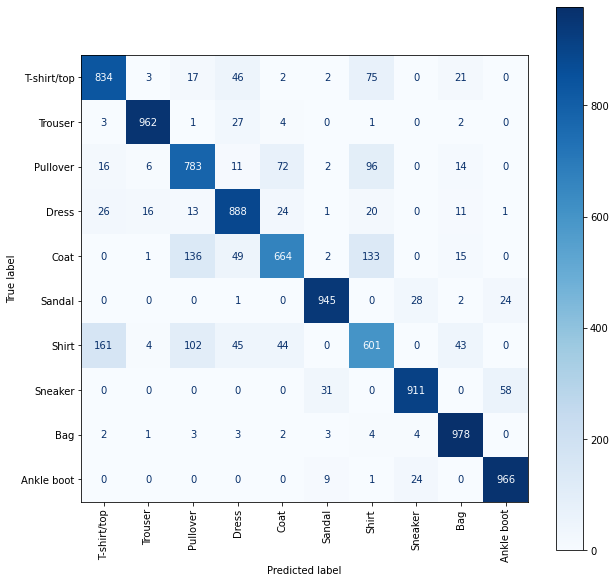

In [32]:
preds = model.predict(X_test)
preds = np.argmax(preds, axis=1)

cm = confusion_matrix(y_tets, preds)
disp = ConfusionMatrixDisplay(cm, display_labels=class_names)

fig, ax = plt.subplots(figsize=(10,10))
disp.plot(ax=ax, xticks_rotation=90, cmap=plt.cm.Blues)